# doing some analysis on covid reports

In [1]:
import pandas as pd

df = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')

In [2]:
df

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
0,1,Andaman and Nicobar Islands,45,10420,10246,129,42,10427,10256,129,,,35,0
1,2,Andhra Pradesh,2355,2331092,2314004,14733,2335,2331417,2314349,14733,,,28,0
2,3,Arunachal Pradesh,487,65680,64897,296,505,65749,64948,296,,,12,0
3,4,Assam,5613,737756,724128,8015,5621,738426,724790,8015,,,18,0
4,5,Bihar,1488,842762,828992,12282,1425,843039,829330,12284,,2,10,2
5,6,Chandigarh,848,96108,94092,1168,869,96256,94218,1169,,1,4,1
6,7,Chhattisgarh,3427,1164546,1147057,14062,3276,1165025,1147685,14064,,2,22,2
7,8,Dadra and Nagar Haveli and Daman and Diu,8,11524,11512,4,8,11525,11513,4,,,26,0
8,9,Delhi,3526,1951930,1922097,26307,3844,1953175,1923023,26308,,1,7,1
9,10,Goa*,807,251803,247146,3850,813,251915,247251,3851,,1,30,1


# removing colum 1 and row 36 as we dont need it

In [3]:
df=df.iloc[:-1,1:]  
df.tail()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
31,Telangana,4986,817367,808270,4111,5170,818290,809009,4111,,,36,0
32,Tripura,1985,106077,103163,929,1999,106308,103380,929,,,16,0
33,Uttarakhand,1969,442120,432444,7707,2113,442428,432608,7707,,,5,0
34,Uttar Pradesh,2871,2100981,2074548,23562,2966,2101489,2074958,23565,,3,9,3
35,West Bengal,19143,2090483,2049994,21346,18003,2091767,2052412,21352,,6,19,6


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
total_states = np.arange(len(df['state_name']))  #storing the length of state_name i.e 0 to 35

total_states      

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

# total positive cases based on the states

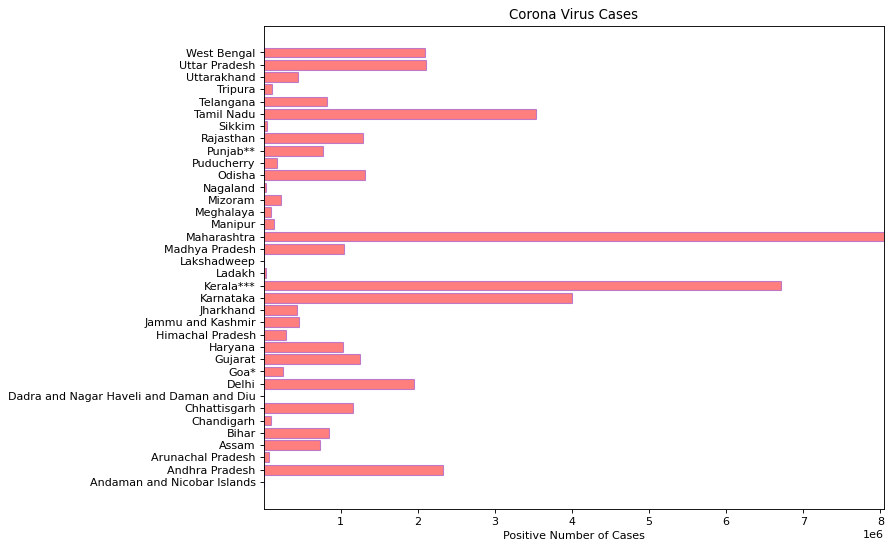

In [13]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.barh(total_states,df['positive'], align='center', alpha=0.5,  
                 color=(1,0,0),  
                 edgecolor=(0.5,0.2,0.8))
    
plt.yticks(total_states, df['state_name'])  
plt.xlim(1,max(df['positive'])+100) 
plt.xlabel('Positive Number of Cases')  
plt.title('Corona Virus Cases')  
plt.show()  

# active number of cases

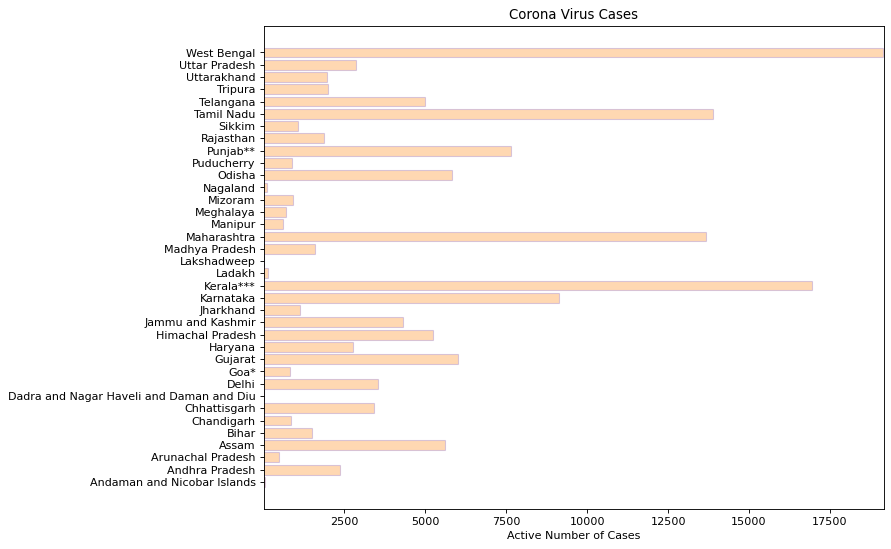

In [21]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.barh(total_states,df['active'], align='center', alpha=0.3,  
                 color=(1,0.5,0),  
                 edgecolor=(0.5,0.4,0.8)  )
    
plt.yticks(total_states, df['state_name'])  
plt.xlim(1,max(df['active'])+10) 
plt.xlabel('Active Number of Cases')  
plt.title('Corona Virus Cases')  
plt.show()  


<AxesSubplot:>

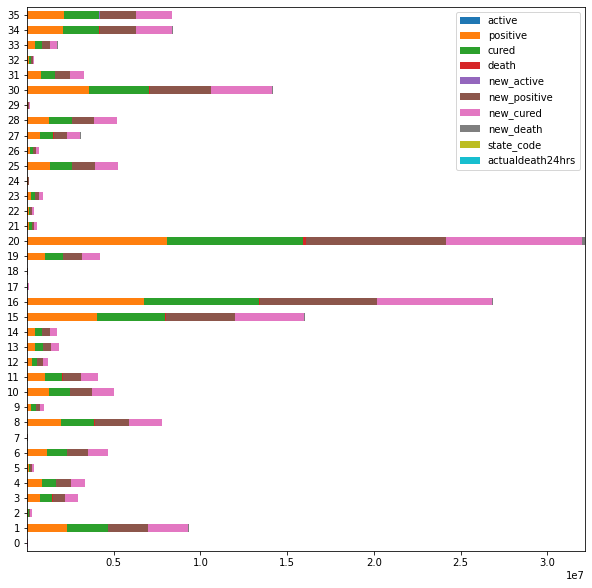

In [22]:
### Plotting Based on Stacking
df.plot.barh(stacked=True,figsize=(10,10))

In [23]:
df.columns

Index(['state_name', 'active', 'positive', 'cured', 'death', 'new_active',
       'new_positive', 'new_cured', 'new_death', 'death_reconsille', 'total',
       'state_code', 'actualdeath24hrs'],
      dtype='object')

In [24]:
df.set_index('state_name', drop=True)

,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
state_name,,,,,,,,,,,,
Andaman and Nicobar Islands,45,10420,10246,129,42,10427,10256,129,,,35,0
Andhra Pradesh,2355,2331092,2314004,14733,2335,2331417,2314349,14733,,,28,0
Arunachal Pradesh,487,65680,64897,296,505,65749,64948,296,,,12,0
Assam,5613,737756,724128,8015,5621,738426,724790,8015,,,18,0
Bihar,1488,842762,828992,12282,1425,843039,829330,12284,,2,10,2
Chandigarh,848,96108,94092,1168,869,96256,94218,1169,,1,4,1
Chhattisgarh,3427,1164546,1147057,14062,3276,1165025,1147685,14064,,2,22,2
Dadra and Nagar Haveli and Daman and Diu,8,11524,11512,4,8,11525,11513,4,,,26,0
Delhi,3526,1951930,1922097,26307,3844,1953175,1923023,26308,,1,7,1


<AxesSubplot:>

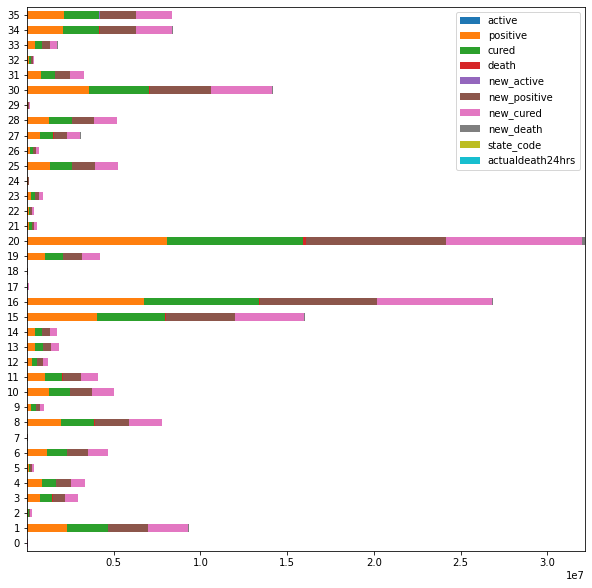

In [25]:
### Plotting Based on Stacking
df.plot.barh(stacked=True,figsize=(10,10))

KeyError: 'active'

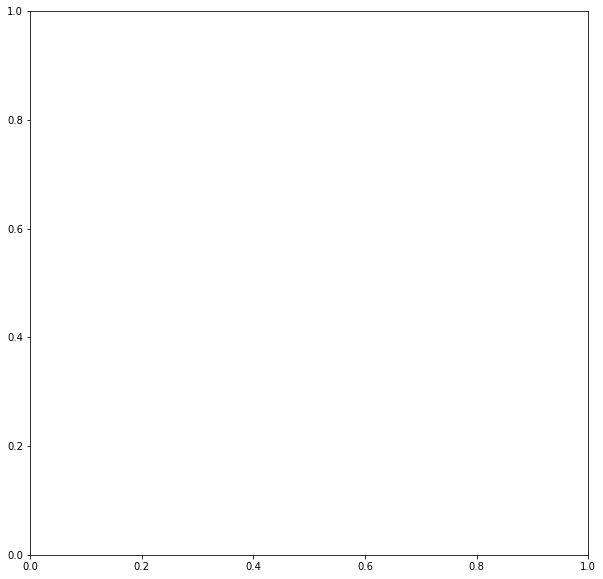

In [26]:
df1=df.iloc[:,1:3]
df1.plot.barh(color={"cured": "red", "positive": "green"},figsize=(10,10))